In [ ]:
! nvidia-smi

Thu Dec  3 01:52:06 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Python Basic

In [ ]:
a = 3
b = 2
a + b

5

## Decision Tree

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.data[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree.export_graphviz(clf,'tree.dot')

In [ ]:
! cat tree.dot

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
4 -> 6 ;
7 [label="X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]"] ;
3 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]"] ;
7 -> 8 ;
9 [label="X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsampl

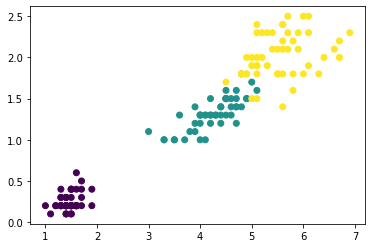

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(iris.data[:,2], iris.data[:,3], c = iris.target)

## Decision Tree Boundary

In [ ]:
X = iris.data[:, [2,3]]
y = iris.target

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth= 2)
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

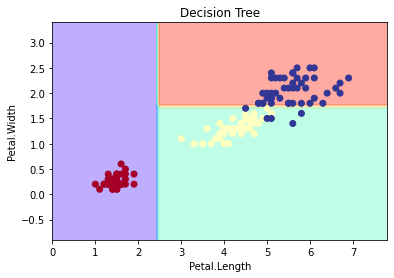

In [ ]:
import numpy as np
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

plt.plot()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()



## Logisitc Regression

In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 300 )
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
X = iris.data[:, [2,3]]
y = iris.target

In [25]:
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

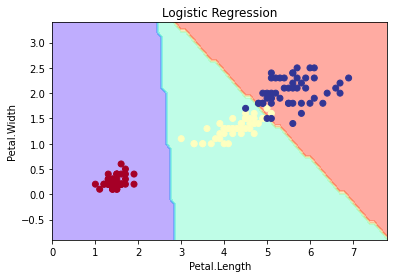

In [27]:
import numpy as np
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

plt.plot()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()



## Activation Function

In [29]:
def threshold_function(x):
  y = x > 0
  return y.astype(int)

import numpy as np
threshold_function(np.array([-1,1,2]))

array([0, 1, 1])

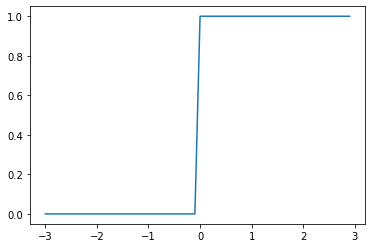

In [30]:
x = np.arange(-3,3,0.1)
plt.plot(x, threshold_function(x))

In [31]:
def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))


In [32]:
x = np.array([-1,1,2])
sigmoid_function(x)

array([0.26894142, 0.73105858, 0.88079708])

In [35]:
x = np.array([-1,1,2,5,6])
sigmoid_function(x)

array([0.26894142, 0.73105858, 0.88079708, 0.99330715, 0.99752738])

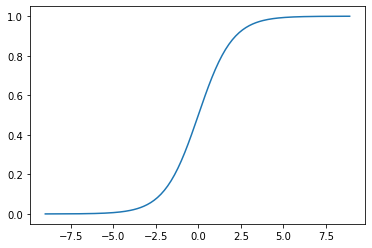

In [34]:
s = np.arange(-9,9,0.1)
plt.plot(s, sigmoid_function(s))

In [36]:
def tangent_function(x):
    return (1 - np.exp(-2*x)) / (1 + np.exp(-2*x))

x = np.array([-1,1,2])
tangent_function(x)


array([-0.76159416,  0.76159416,  0.96402758])

In [37]:
np.tanh(x)

array([-0.76159416,  0.76159416,  0.96402758])

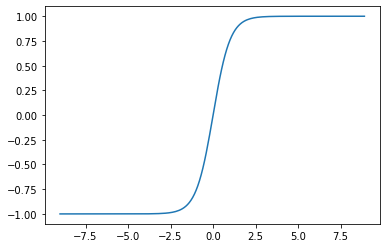

In [38]:
s = np.arange(-9,9,0.1)
plt.plot(s, np.tanh(s))

In [39]:
def relu_function(x):
    return np.maximum(0,x)

x = np.array([-1,1,2])
relu_function(x)


array([0, 1, 2])

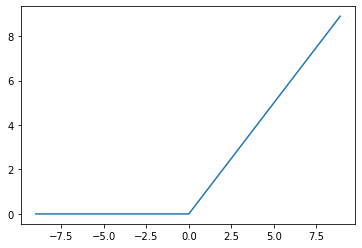

In [40]:
s = np.arange(-9,9,0.1)
plt.plot(s, relu_function(s))

## Neural Network

In [41]:
import numpy as np
X = np.array([1,2])
W = np.array([[1,3,5],
              [2,4,6]])

In [43]:
X.shape

(2,)

In [44]:
W.shape

(2, 3)

In [46]:
a = np.dot(X,W)
a

array([ 5, 11, 17])

In [47]:
a1 = sigmoid_function(a)

In [48]:
a1

array([0.99330715, 0.9999833 , 0.99999996])

In [49]:
W2 = np.array([[1,2],[3,4],[5,6]])

In [50]:
np.dot(a1, W2)

array([ 8.99325684, 11.98654724])

In [51]:
network = {}
network['w1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
network['b1'] = np.array([0.1,0.2,0.3])
network['w2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
network['b2'] = np.array([0.1,0.2])


In [52]:
x = np.array([1,0.5])


In [53]:
a = np.dot(x, network['w1']) + network['b1']

In [54]:
a

array([0.3, 0.7, 1.1])

In [55]:
z = sigmoid_function(a)
z

array([0.57444252, 0.66818777, 0.75026011])

In [57]:
y = np.dot(z, network['w2']) + network['b2']

In [58]:
y

array([0.51615984, 1.21402696])

In [59]:

def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

y = np.array([-1,1,2])
softmax_function(y)


array([0.03511903, 0.25949646, 0.70538451])

In [60]:
def mean_squared_err(y_hat, y):
    return 0.5 * np.sum((y_hat - y) ** 2)


In [61]:
def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))


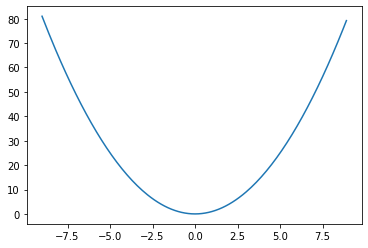

In [62]:
def func(x):
    return x ** 2 
s = np.arange(-9,9,0.1)
plt.plot(s, func(s))


In [63]:
def dfunc(f, x):
    h = 1e-4 
    return (f(x+h) - f(x)) / (h)

In [64]:
func(3)

9

In [65]:
dfunc(func, 3)

6.000100000012054

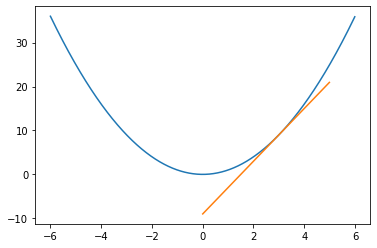

In [66]:
# 切線函數
def tfunc(f, x, t):
    d = dfunc(f, x)
    y = f(x) - d*x
    return d*t + y

# 繪製 x ^ 2 
x = np.arange(-6, 6, 0.01)
y = func(x)
plt.plot(x, y)

# 繪製x = 3 時的切線
x2 = np.arange(0, 5, 0.01)
y2 = tfunc(func, 3, x2)
plt.plot(x2, y2)


In [67]:
def dfunc(f, x):
    h = 1e-4 
    return (f(x+h) - f(x-h)) / (2*h)


In [68]:
dfunc(func, 3)

6.000000000012662

In [ ]:
# intial: 3 , gradient: 6, learning rate: 0.8
# step : 3 - 0.8 * 6 = -1.8, gradient: -3.6
# step : -1.8 - (-3.6 * 0.8)

In [69]:
def gradient_descent(func, init_x, lr = 0.3, epochs = 100):    
    x = init_x       
    res = [x]
    for i in range(epochs):         
        grad = dfunc(func,x)        
        x = x - grad * lr
        res.append(x)
    return np.array(res)

In [70]:
x = gradient_descent(func, 3, lr=0.8)
x

array([ 3.00000000e+00, -1.80000000e+00,  1.08000000e+00, -6.48000000e-01,
        3.88800000e-01, -2.33280000e-01,  1.39968000e-01, -8.39808000e-02,
        5.03884800e-02, -3.02330880e-02,  1.81398528e-02, -1.08839117e-02,
        6.53034701e-03, -3.91820820e-03,  2.35092492e-03, -1.41055495e-03,
        8.46332972e-04, -5.07799783e-04,  3.04679870e-04, -1.82807922e-04,
        1.09684753e-04, -6.58108519e-05,  3.94865112e-05, -2.36919067e-05,
        1.42151440e-05, -8.52908641e-06,  5.11745185e-06, -3.07047111e-06,
        1.84228266e-06, -1.10536960e-06,  6.63221759e-07, -3.97933055e-07,
        2.38759833e-07, -1.43255900e-07,  8.59535400e-08, -5.15721240e-08,
        3.09432744e-08, -1.85659646e-08,  1.11395788e-08, -6.68374727e-09,
        4.01024836e-09, -2.40614902e-09,  1.44368941e-09, -8.66213646e-10,
        5.19728188e-10, -3.11836913e-10,  1.87102148e-10, -1.12261289e-10,
        6.73567731e-11, -4.04140639e-11,  2.42484383e-11, -1.45490630e-11,
        8.72943780e-12, -

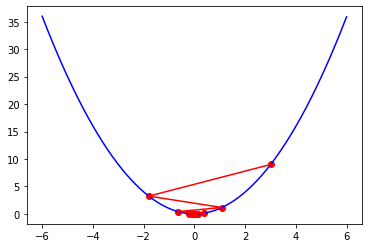

In [72]:

t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')    


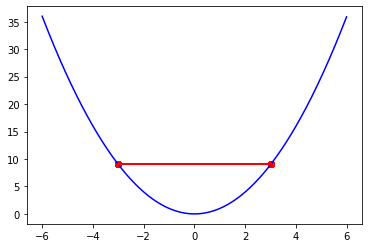

In [73]:
x = gradient_descent(func, 3, lr=1)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')  

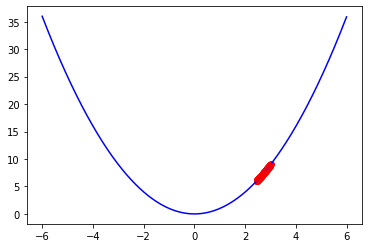

In [74]:
x = gradient_descent(func, 3, lr=0.001)
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c='r')    
plt.scatter(x, func(x), c='r')  

In [75]:
# 初始網路
x  = np.array([0.6, 0.9])

np.random.seed(42)
weight   = np.random.randn(2,3)
z        = np.dot(x, weight)

# 取得預測值 y_hat
y_hat    = softmax_function(z)
y_hat

array([0.73222998, 0.10288817, 0.16488185])

In [76]:
# 計算代價(損失)
y        = np.array([0, 0, 1])


In [77]:
def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))

cross_entropy_err(y_hat, y)

1.8025260716416405

In [78]:
def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad


In [79]:
def predict(x):
    return np.dot(x, weight)

def loss(x, y):
    z = predict(x)
    y_hat = softmax_function(z)
    loss = cross_entropy_err(y_hat, y)
    return loss

func = lambda w: loss(x, y)
dfunc(func, weight)


array([[ 0.43933796,  0.0617329 , -0.50107086],
       [ 0.65900694,  0.09259935, -0.75160629]])

## Training Neural Network

In [109]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_function(x):
    return 1/ (1 + np.exp(-x))

def dfunc(f, x):
    h = 1e-4 
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:     
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        it.iternext()   
    return grad

def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y*np.log(y_hat + delta))

In [110]:
class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
 
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax_function(a2)
        return y
        
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
        
    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

In [111]:
net = ANN(input_size=4, hidden_size=5, output_size=3)

In [112]:
from sklearn.datasets import load_iris
iris = load_iris()
x= iris.data

In [100]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [113]:
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1

In [102]:
y[0:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [103]:
net.predict(x)[0:3]

array([[0.00225455, 0.00220925, 0.0022026 ],
       [0.00225454, 0.0022093 , 0.00220259],
       [0.00225456, 0.0022093 , 0.0022026 ]])

In [114]:
import time
a = time.clock()
epochs = 3000
lr     = 0.01

train_loss = []
for i in range(epochs):         
    grad = net.numerical_gradient(x,y)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x, y)
    train_loss.append(loss)
time.clock() -a

23.955813000000006

In [115]:
net.predict(x)[0:3]

array([[6.71113882e-03, 1.02078880e-05, 4.82566274e-08],
       [6.63676429e-03, 1.03189021e-05, 4.87173747e-08],
       [6.71130948e-03, 1.02715294e-05, 4.80402166e-08]])

Populating the interactive namespace from numpy and matplotlib


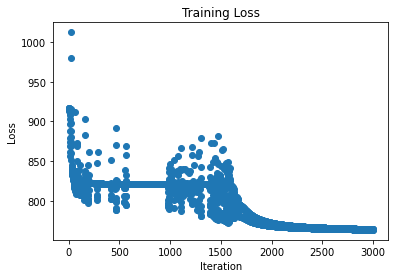

In [116]:
%pylab inline
import matplotlib.pyplot as plt
plt.scatter(range(0,3000),train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [119]:
predicted = np.argmax(net.predict(x), axis = 1)

In [120]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(iris.target, predicted)

0.9733333333333334

In [121]:
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 46,  4],
       [ 0,  0, 50]])